2025-05-07 00:33:30.436847: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - loss: 100635.5234
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 98456.1328
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 96898.6172
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 95608.4062
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 94473.2500
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 93441.1562
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 92483.1797
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 91581.3281
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 90723.6016
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 89901.5000
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 89108.7734
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 88340.7109
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 87593.6719
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 86864.7422
Epoch 15/100

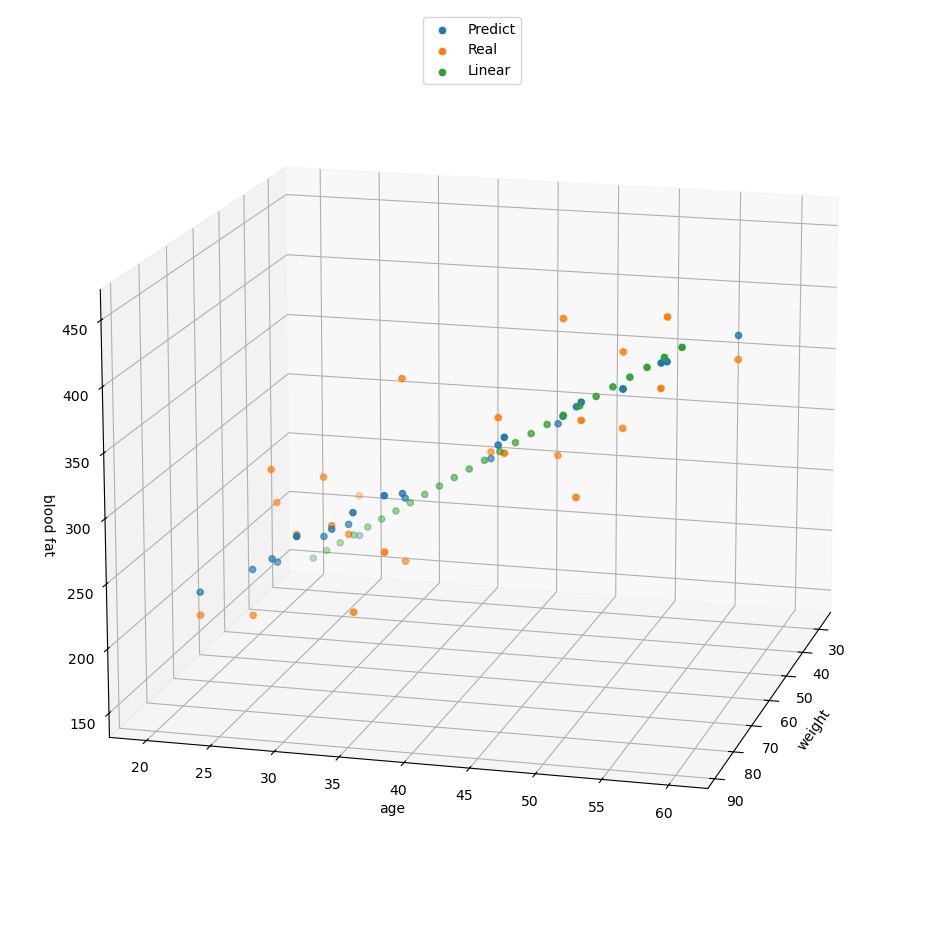

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np


raw_data = np.loadtxt('Blood_fat.csv', delimiter=',')
xs = np.array(raw_data[:,0], dtype = np.float32)
ys = np.array(raw_data[:,1], dtype = np.float32)
zs = np.array(raw_data[:,2], dtype = np.float32)
x_data = np.array(raw_data[:, 0:2], dtype=np.float32)
y_data = np.array(raw_data[:,2], dtype=np.float32)
y_data = y_data.reshape(25, 1)

rmsprop = RMSprop(learning_rate=0.01)
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss = 'mse', optimizer=rmsprop)
model.summary()

hist = model.fit(x_data, y_data, epochs=1000)
print(hist.history.keys())
print('100kg age:40, blood fat rate=', model.predict(np.array([100, 40]).reshape(1, 2)))
print('60kg age:25, blood fat rate=', model.predict(np.array([60, 25]).reshape(1, 2)))

w_, b_ = model.get_weights()

x = x_data[:, 0]
y = x_data[:, 1]
z = np.matmul(x_data, w_)+b_

x_l = np.linspace(np.min(x_data, axis=0)[0], np.max(x_data, axis=0)[0], len(x_data)).reshape(25, 1)
y_l = np.linspace(np.min(x_data, axis=0)[1], np.max(x_data, axis=0)[1], len(x_data)).reshape(25, 1)
print('x=', x_l.shape)
print('y=', y_l.shape)

X = np.concatenate((x_l, y_l), axis = 1)
print('X=', X.shape)
z_l = np.matmul(X, w_)+b_

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection = '3d')

z_reshaped = z.reshape(25)
ax.scatter(x, y, z_reshaped, label = 'Predict')
ax.scatter(xs, ys, zs, label='Real')

ax.scatter(x_l, y_l, z_l, label='Linear')
ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood fat')
ax.view_init(15, 15)
plt.legend(loc='upper center')
plt.show()